In [1]:
import pandas as pd
df=pd.read_csv('option_train.csv')

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import itertools
import time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [3]:
df.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1679 non-null   float64
 1   S       1679 non-null   float64
 2   K       1678 non-null   float64
 3   tau     1679 non-null   float64
 4   r       1680 non-null   float64
 5   BS      1680 non-null   object 
dtypes: float64(5), object(1)
memory usage: 78.9+ KB


In [5]:
df['S']=df['S'].replace(0, np.nan)

In [6]:
df.isnull().sum()

Value    1
S        2
K        2
tau      1
r        0
BS       0
dtype: int64

In [7]:
bs= list(df.BS.values)

In [8]:
df=df.drop('BS', axis=1)

In [9]:
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [10]:
x = df.to_numpy()

In [11]:
x=imputer.fit_transform(x)

In [12]:
df.columns

Index(['Value', 'S', 'K', 'tau', 'r'], dtype='object')

In [13]:
df=pd.DataFrame(x, columns=['Value', 'S', 'K', 'tau', 'r'])
df['BS']=bs

In [14]:
df.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under


In [15]:
df.isnull().sum()

Value    0
S        0
K        0
tau      0
r        0
BS       0
dtype: int64

In [16]:
df.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under


In [17]:
bs={'Under':0, 'Over':1}

In [18]:
df.BS=df.apply(lambda x: 0 if x['BS']=='Under' else 1, axis=1)

In [19]:
df.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0


In [20]:
df['S/K']=df['S']/df['K']
df['FVS']=df['S']*(1+df['r'])**(df['tau'])
df['FVS/K']=df['FVS']/df['K']
df['PVK']=df['K']/(1+df['r'])**(df['tau'])
df['S/PVK']= df['S']/df['PVK']
df['S-K/S']=(df['S']-df['K'])/df['S']
df['S-K/K']=(df['S']-df['K'])/df['K']

In [21]:
df.corr()

,Value,S,K,tau,r,BS,S/K,FVS,FVS/K,PVK,S/PVK,S-K/S,S-K/K
Value,1.000000,0.086653,-0.885775,-0.029464,0.042009,-0.753953,0.945363,-0.023074,-0.021850,-0.733498,-0.021850,0.928435,0.945363
S,0.086653,1.000000,0.212025,0.026806,-0.458465,-0.087636,0.106022,0.026237,0.025986,0.170301,0.025986,0.108883,0.106022
K,-0.885775,0.212025,1.000000,0.039393,-0.174262,0.750531,-0.947631,0.033965,0.032609,0.818590,0.032609,-0.948214,-0.947631
tau,-0.029464,0.026806,0.039393,1.000000,-0.008309,0.039272,-0.031120,0.884845,0.885506,-0.524683,0.885506,-0.030804,-0.031120
r,0.042009,-0.458465,-0.174262,-0.008309,1.000000,-0.069523,0.033443,-0.005170,-0.004948,-0.144171,-0.004948,0.029263,0.033443
BS,-0.753953,-0.087636,0.750531,0.039272,-0.069523,1.000000,-0.788418,0.028869,0.027869,0.607743,0.027869,-0.791795,-0.788418
S/K,0.945363,0.106022,-0.947631,-0.031120,0.033443,-0.788418,1.000000,-0.025556,-0.024255,-0.777308,-0.024255,0.998380,1.000000
FVS,-0.023074,0.026237,0.033965,0.884845,-0.005170,0.028869,-0.025556,1.000000,0.999998,-0.402495,0.999998,-0.025498,-0.025556
FVS/K,-0.021850,0.025986,0.032609,0.885506,-0.004948,0.027869,-0.024255,0.999998,1.000000,-0.404172,1.000000,-0.024199,-0.024255
PVK,-0.733498,0.170301,0.818590,-0.524683,-0.144171,0.607743,-0.777308,-0.402495,-0.404172,1.000000,-0.404172,-0.777590,-0.777308


In [22]:
df.sort_values(by='r', ascending=False)

,Value,S,K,tau,r,BS,S/K,FVS,FVS/K,PVK,S/PVK,S-K/S,S-K/K
1328,27.244374,428.042219,405.0,0.170635,0.03188,0,1.056894,430.340503,1.062569,402.837050,1.062569,0.053832,0.056894
1263,9.500000,426.025007,430.0,0.281746,0.03188,0,0.990756,429.808563,0.999555,426.214759,0.999555,-0.009330,-0.009244
393,45.842621,426.025007,385.0,0.281746,0.03188,0,1.106558,429.808563,1.116386,381.610888,1.116386,0.096297,0.106558
598,50.547908,426.025007,380.0,0.281746,0.03188,0,1.121118,429.808563,1.131075,376.654903,1.131075,0.108034,0.121118
1231,22.831499,428.042219,410.0,0.170635,0.03188,0,1.044005,430.340503,1.049611,407.810347,1.049611,0.042151,0.044005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,6.000000,449.367877,455.0,0.198413,0.02951,1,0.987622,451.968418,0.993337,452.382016,0.993337,-0.012533,-0.012378
763,37.635668,449.367877,415.0,0.198413,0.02951,0,1.082814,451.968418,1.089081,412.612168,1.089081,0.076480,0.082814
1158,12.030810,449.367877,445.0,0.198413,0.02951,0,1.009815,451.968418,1.015659,442.439554,1.015659,0.009720,0.009815
1400,4.440000,448.218393,465.0,0.309524,0.02951,1,0.963911,452.271412,0.972627,460.832915,0.972627,-0.037441,-0.036089


In [23]:
df.shape

(1680, 13)

In [24]:
Yc = df.Value
Xf = df.drop(['Value','BS'],axis=1)

In [25]:
def fit_linear_reg(Xf,Yc):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(Xf,Yc)
    RSS = mean_squared_error(Yc,model_k.predict(Xf)) * len(Yc)
    R_squared = model_k.score(Xf,Yc)
    return RSS, R_squared

In [26]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(Xf.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(Xf.columns,k):
        tmp_result = fit_linear_reg(Xf[list(combo)],Yc)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df1 = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

<ipython-input-26-57678c2478a9>:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(Xf.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/11 [00:00<?, ?it/s]

In [27]:
df1.sort_values('R_squared', ascending=False, inplace=True)

In [28]:
df1.head(1)

,numb_features,RSS,R_squared,features
1986,9,2456.595925,0.992572,"(S, K, tau, r, S/K, FVS, PVK, S/PVK, S-K/S)"


In [29]:
df1.iloc[0,3]

('S', 'K', 'tau', 'r', 'S/K', 'FVS', 'PVK', 'S/PVK', 'S-K/S')

In [45]:
data=df[['S', 'K', 'tau', 'r', 'S/K', 'FVS', 'PVK', 'S/PVK', 'S-K/S', 'Value', 'BS']]
data.head()

,S,K,tau,r,S/K,FVS,PVK,S/PVK,S-K/S,Value,BS
0,431.623898,420.0,0.341270,0.03013,1.027676,436.018730,415.766628,1.038140,0.026931,21.670404,0
1,427.015526,465.0,0.166667,0.03126,0.918313,429.211841,462.620554,0.923036,-0.088953,0.125000,1
2,427.762336,415.0,0.265873,0.03116,1.030753,431.266359,411.628141,1.039196,0.029835,20.691244,0
3,451.711658,460.0,0.063492,0.02972,0.981982,452.552391,459.145431,0.983810,-0.018349,1.035002,1
4,446.718974,410.0,0.166667,0.02962,1.089558,448.897543,408.010208,1.094872,0.082197,39.553020,0


In [46]:
df=data

In [47]:
df.shape

(1680, 11)

In [52]:
df1=df.copy()

## Regression

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold ## for regression
from sklearn.model_selection import cross_val_score

In [53]:
# test and train
from sklearn.model_selection import train_test_split
x, y = df.iloc[:, :9].values, df.iloc[:, 9].values
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

# standardized x
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train = stdsc.fit_transform(x_train)
x_test = stdsc.transform(x_test)

In [54]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(); linear_model.fit(x_train, y_train)
r_sq = linear_model.score(x_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.992528077359818


In [55]:
r_sq = linear_model.score(x_test, y_test)
print('out of sample r_sq:', r_sq)

out of sample r_sq: 0.9925420572039823


### KNN regression

In [56]:
from sklearn.neighbors import KNeighborsRegressor
# K Nearest Neighbor Regression
knn_regression = KNeighborsRegressor()
r2_knnr_cv = cross_val_score(knn_regression, x_train, y_train, cv=kfolds_regresssion) 
print("K Nearest Neighbor Regression: \n")
print("r squared of 10-folds:",r2_knnr_cv,"(mean r squared:",np.mean(r2_knnr_cv),")")

K Nearest Neighbor Regression: 

r squared of 10-folds: [0.97705265 0.96915128 0.97805091 0.93868911 0.84847371 0.97991151
 0.9813815  0.96150871 0.96817822 0.97200434] (mean r squared: 0.9574401926180528 )


In [64]:
# K Nearest Neighbor Regression
for K in range(1,8):
    knn_regression = KNeighborsRegressor(K)
    r2_knnr_cv = cross_val_score(knn_regression, x_train, y_train, cv=kfolds_regresssion)
    print(f"K Nearest Neighbor Regression: {K}\n",)
    print("r squared of 10-folds:",r2_knnr_cv,"(mean r squared:",np.mean(r2_knnr_cv),")\n")

K Nearest Neighbor Regression: 1

r squared of 10-folds: [0.96893118 0.95796407 0.96135967 0.97150205 0.79403374 0.97172117
 0.9734376  0.93299591 0.95126828 0.95929455] (mean r squared: 0.9442508216822073 )

K Nearest Neighbor Regression: 2

r squared of 10-folds: [0.9784782  0.96940899 0.96768095 0.94776263 0.83695936 0.97433804
 0.97779533 0.95903259 0.96603453 0.96948174] (mean r squared: 0.9546972365216495 )

K Nearest Neighbor Regression: 3

r squared of 10-folds: [0.97843325 0.96993863 0.97317674 0.94376616 0.83055634 0.97833778
 0.97873189 0.95979936 0.96873886 0.97088581] (mean r squared: 0.9552364812206282 )

K Nearest Neighbor Regression: 4

r squared of 10-folds: [0.97595782 0.96826717 0.9766488  0.94228994 0.844433   0.98060309
 0.97813009 0.96272047 0.96782824 0.97240439] (mean r squared: 0.9569283015973695 )

K Nearest Neighbor Regression: 5

r squared of 10-folds: [0.97705265 0.96915128 0.97805091 0.93868911 0.84847371 0.97991151
 0.9813815  0.96150871 0.96817822 0.9720

### Decision Trees Regresssion

In [65]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [66]:
# Decision Tree with 2 maximum depth
decision_tree_regression = DecisionTreeRegressor(max_depth=2)
r2_dcr_cv = cross_val_score(decision_tree_regression, x_train, y_train, cv=kfolds_regresssion) 
print("Decision Tree for Regression: \n")
print("r squared of 10-folds:",r2_dcr_cv,"(mean r squared:",np.mean(r2_dcr_cv),")")

Decision Tree for Regression: 

r squared of 10-folds: [0.94159138 0.91809514 0.93423413 0.9073309  0.86496483 0.92425024
 0.92938329 0.90369864 0.90578334 0.91885408] (mean r squared: 0.9148185965207754 )


In [68]:
# Decision Tree with 5 maximum depth
decision_tree_regression_2 = DecisionTreeRegressor()
r2_dcr_cv_2 = cross_val_score(decision_tree_regression_2, x_train, y_train, cv=kfolds_regresssion) 
print("Decision Tree for Regression: \n")
print("r squared of 10-folds:",r2_dcr_cv_2,"(mean r squared:",np.mean(r2_dcr_cv_2),")")

Decision Tree for Regression: 

r squared of 10-folds: [0.99666229 0.99758474 0.99623577 0.99724788 0.95833309 0.9955058
 0.99737149 0.9952252  0.99638493 0.99678758] (mean r squared: 0.9927338773986802 )


### Ridge

In [69]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [70]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [72]:
ridge = Ridge()
coefs = []
for a in alphas: 
    ridge.set_params(alpha=a) 
    ridge.fit(x_train, y_train) 
    coefs.append(ridge.coef_)
np.shape(coefs)

(100, 9)

Text(0, 0.5, 'standardized coef')

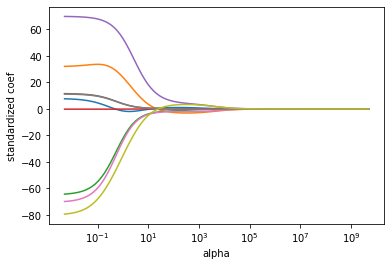

In [73]:
%matplotlib inline
ax = plt.gca() # Get the current Axes instance
ax.plot(alphas, coefs)
ax.set_xscale('log') ## you can try removing this line and see what it looks␣like 
plt.xlabel('alpha')
plt.ylabel('standardized coef')

In [75]:
ridgecv = RidgeCV(alphas=alphas, scoring='r2', cv=10)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

115.5064850041579

In [77]:
# Ridge Regression with alpha = 10**5
ridge = Ridge(alpha=352.74)
r2_ridge_cv = cross_val_score(ridge, x_train, y_train, cv=kfolds_regresssion) 
print("Ridge Regression: \n")
print("r squared of 10-folds:",r2_ridge_cv,"(mean r squared:",np.mean(r2_ridge_cv),")")

Ridge Regression: 

r squared of 10-folds: [0.86436801 0.87711673 0.86533921 0.88398224 0.79512267 0.8600991
 0.88868034 0.86001204 0.84811235 0.85202122] (mean r squared: 0.8594853922928877 )


### Classification

In [83]:
# test and train
from sklearn.model_selection import train_test_split
x1, y1 = df.iloc[:, :9].values, df.iloc[:, 10].values
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1,
                                                    test_size=0.3,
                                                    random_state=0)

# standardized x
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train1 = stdsc.fit_transform(x_train1)
x_test1 = stdsc.transform(x_test1)

In [96]:
# ML Logit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [97]:
kfolds_classification = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
logistic_regression = LogisticRegression(penalty='none', max_iter=300).fit(x_train1, y_train1)
error_lr_cv = cross_val_score(logistic_regression, x_train1, y_train1, cv=kfolds_classification) 
print("Logisgic Regression: \n")
print("accuracies of 10-folds:",error_lr_cv,"(mean classification error:",1-np.mean(error_lr_cv),")")

Logisgic Regression: 

accuracies of 10-folds: [0.88983051 0.92372881 0.92372881 0.91525424 0.94067797 0.93220339
 0.91452991 0.88888889 0.92307692 0.91452991] (mean classification error: 0.08335506301607987 )


In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
for K in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=K)
    error_knn_cv = cross_val_score(knn, x_train1, y_train1, cv=kfolds_classification) 
    print(f"K Nearest Neighbor {K}: \n")
    print("accuracies of 10-folds:",error_knn_cv,"(mean classification error:",1-np.mean(error_knn_cv),")")

K Nearest Neighbor 1: 

accuracies of 10-folds: [0.91525424 0.92372881 0.89830508 0.93220339 0.94915254 0.91525424
 0.90598291 0.91452991 0.91452991 0.88888889] (mean classification error: 0.08421700709836288 )
K Nearest Neighbor 2: 

accuracies of 10-folds: [0.91525424 0.93220339 0.91525424 0.93220339 0.96610169 0.94067797
 0.92307692 0.92307692 0.93162393 0.84615385] (mean classification error: 0.07743734608141373 )
K Nearest Neighbor 3: 

accuracies of 10-folds: [0.94067797 0.92372881 0.92372881 0.94915254 0.94915254 0.93220339
 0.93162393 0.91452991 0.8974359  0.86324786] (mean classification error: 0.07745183253657828 )
K Nearest Neighbor 4: 

accuracies of 10-folds: [0.92372881 0.92372881 0.93220339 0.93220339 0.94915254 0.92372881
 0.91452991 0.92307692 0.90598291 0.84615385] (mean classification error: 0.0825510647544545 )


### Decision Tree

In [101]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [102]:
decision_tree_classification = DecisionTreeClassifier()
error_dcc_cv = cross_val_score(decision_tree_classification, x_train1, y_train1, cv=kfolds_classification) 
print("Decision Tree Classification: \n")
print("accuracies of 10-folds:",error_dcc_cv,"(mean classification error:",1-np.mean(error_dcc_cv),")")

Decision Tree Classification: 

accuracies of 10-folds: [0.94067797 0.93220339 0.90677966 0.88135593 0.91525424 0.94067797
 0.87179487 0.90598291 0.90598291 0.88888889] (mean classification error: 0.09104012748080537 )


### Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
random_forest = RandomForestClassifier(n_estimators = 200)
error_rf_cv = cross_val_score(random_forest, x_train1, y_train1, cv=kfolds_classification) 
print("Random Forest: \n")
print("accuracies of 10-folds:",error_rf_cv,"(mean classification error:",1-np.mean(error_rf_cv),")")

Random Forest: 

accuracies of 10-folds: [0.92372881 0.95762712 0.91525424 0.93220339 0.94067797 0.94067797
 0.95726496 0.91452991 0.91452991 0.90598291] (mean classification error: 0.06975228161668845 )


In [108]:
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier(random_state=1, n_estimators = 200)
clf_rf.fit(x_train1, y_train1)
y_pred_rf = clf_rf.predict(x_test1)
score_test_rf = accuracy_score(y_test1, y_pred_rf)
print(score_test_rf)

0.9107142857142857


### ROC

In [110]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
c_prob = clf_rf.predict_proba(x_test1)
c_prob1 = c_prob[:, 1]
fpr,tpr,threshold = roc_curve(y_test1, c_prob1)

In [111]:
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)
roc_auc

0.9799375800256082

<Figure size 432x288 with 0 Axes>

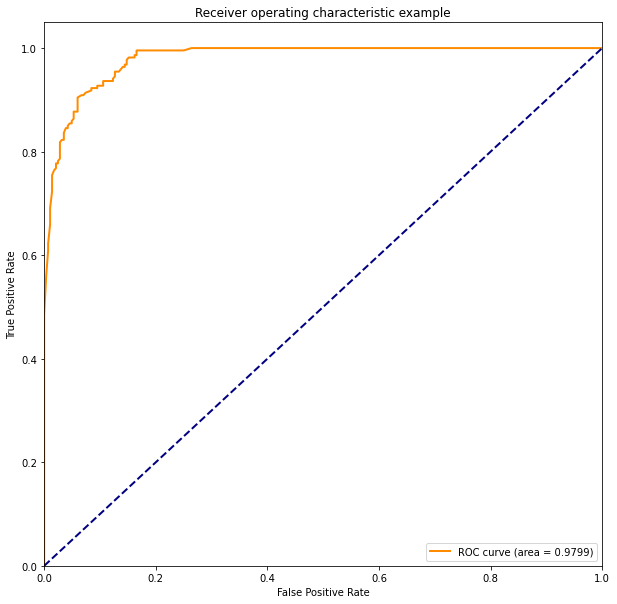

In [112]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # lw is linewidth
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [44]:
# ML LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [45]:
lda.score(x_train, y_train)

0.8979591836734694

In [58]:
from sklearn.model_selection import KFold ## for regression
from sklearn.model_selection import StratifiedKFold ## recommended for classification
kfolds = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)

In [59]:
cv_classification_errors_1 = []
cv_auc_1 = []

In [61]:
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

for train_index, test_index in kfolds.split(df,df['BS']):
# train the logistic model
    result = smf.logit('BS ~ S+K+tau+r', data=df, subset= train_index).fit()
# select the test set according to test_index produced by kfolds.split
    X_test = df.loc[test_index,["S","K",'tau','r']]
    y_test = df.loc[test_index,"BS"]
# compute the probabilities of test data
    result_prob = result.predict(X_test)
# select 0.5 as the threshold
    result_pred = (result_prob > 0.5)
# compute the classification error
    classification_error = np.mean(result_pred != y_test)
# add the computed classification error to "cv_classification_errors_1" to store the result
    cv_classification_errors_1.append(classification_error)
# calculate the auc
    fpr,tpr,threshold = roc_curve(y_test, result_prob)
    roc_auc = auc(fpr,tpr)
# add the computed auc to "cv_auc_1" to store the result
    cv_auc_1.append(roc_auc)

Optimization terminated successfully.
         Current function value: 0.214436
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.212745
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200383
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.215963
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.211371
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214921
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.216057
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.212221
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205214
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214873
  

In [62]:
print("classification errors using 10-fold CV: {}\n".format(cv_classification_errors_1))
print("mean of classification errors using 10-fold CV: {}\n".format(np.mean(cv_classification_errors_1)))

classification errors using 10-fold CV: [0.09523809523809523, 0.07738095238095238, 0.11904761904761904, 0.07142857142857142, 0.10119047619047619, 0.08333333333333333, 0.06547619047619048, 0.09523809523809523, 0.11904761904761904, 0.10119047619047619]

mean of classification errors using 10-fold CV: 0.09285714285714285



In [63]:
print("auc using 10-fold CV: {}\n".format(cv_auc_1))
print("mean of auc using 10-fold CV: {}\n".format(np.mean(cv_auc_1)))

auc using 10-fold CV: [0.9775054073540015, 0.9753424657534246, 0.9531362653208364, 0.982984859408796, 0.9700072098053353, 0.9803893294881039, 0.9834675100632547, 0.9741230592294422, 0.9646348476135711, 0.9797297297297297]

mean of auc using 10-fold CV: 0.9741320683766496

